In [1]:
'''
In this program it will be aimed to authorship analysis which is the text mining task that aims to identify certain aspects about an author, based only on the content of their writings.
'''

'\nIn this program it will be aimed to authorship analysis which is the text mining task that aims to identify certain aspects about an author, based only on the content of their writings.\n'

In [2]:
# Getting the data (After running this code, run the getdata.py)
import os
import sys
data_folder = os.path.join(os.path.expanduser('~'), "OneDrive", "Desktop", "Pace", "CS619", "Chapter09", "books")

In [3]:
# Defining a function to perform the preprocessing of the data
def clean_book(document):
    lines = document.split("\n")
    start = 0
    end = len(lines)
    for i in range(len(lines)):
        line = lines[i]
        if line.startswith("*** START OF THIS PROJECT GUTENBERG"):
            start = i+1
        elif line.startswith("*** END OF THIS PROJECT GUTENBERG"):
            end = i-1
    return "\n".join(lines[start:end])

In [4]:
# Defining a function to get the documents and classes
import numpy as np

def load_books_data(folder=data_folder):
    documents = []
    authors = []
    subfolders = [subfolder for subfolder in os.listdir(folder)
                    if os.path.isdir(os.path.join(folder, subfolder))]
    for author_number, subfolder in enumerate(subfolders):
        full_subfolder_path = os.path.join(folder, subfolder)
        for document_name in os.listdir(full_subfolder_path):
            with open(os.path.join(full_subfolder_path, document_name), errors='ignore') as inf:
                documents.append(clean_book(inf.read()))
                authors.append(author_number)
    return documents, np.array(authors, dtype='int')

In [5]:
# Loading the books
documents, classes = load_books_data(data_folder)

In [6]:
# Checking documents length
documents_length = [len(document) for document in documents]
print(documents_length)

[547906, 446305, 977810, 740774, 1960963, 75589, 94697, 994088, 123920, 74284, 129812, 82311, 84546, 46915, 290193, 184579, 37222, 204803, 165733, 211896, 293942, 508728, 627653, 164488, 370334, 1746373, 929642, 1993356, 1418796, 1880698, 1848505, 1880379, 757345, 437622, 311815, 609333, 686421, 257056, 280552, 164834, 766427, 424189, 113716, 351722, 562518, 16739, 682112, 233455, 260615, 337994, 38855, 62977, 46396, 40227, 59902, 31853, 42692, 55749, 33507, 243046, 365047, 233983, 698982, 414125, 462353, 318711, 394790, 312165, 384716, 95115, 213268, 375640, 167118, 520068, 392333, 276234, 412862, 266695, 473337, 206572, 407406, 812859, 582849, 825439, 565356, 555566, 648590, 908465, 694792, 873716, 939279, 669686, 11246, 227867, 373266, 396769, 328534, 389947, 197756, 88469, 300339, 415566, 497406, 382684, 113700, 175372, 382882, 417553, 71858, 93473, 226926, 406699, 377809, 348922, 340658, 465233, 341368, 89960, 93974, 130293, 259947, 564438, 569993, 469896, 103229, 877340, 120299, 

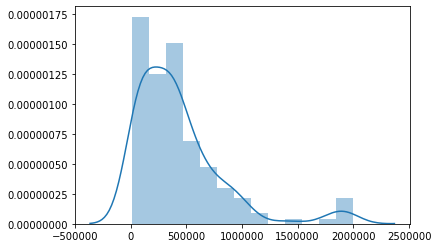

In [7]:
# Ploting a histogram of documents length
import seaborn as sns
sns.distplot(documents_length)

In [8]:
# Setting a list of function words
function_words = ["a", "able", "aboard", "about", "above", "absent",
                "according" , "accordingly", "across", "after", "against",
                "ahead", "albeit", "all", "along", "alongside", "although",
                "am", "amid", "amidst", "among", "amongst", "amount", "an",
                "and", "another", "anti", "any", "anybody", "anyone",
                "anything", "are", "around", "as", "aside", "astraddle",
                "astride", "at", "away", "bar", "barring", "be", "because",
                "been", "before", "behind", "being", "below", "beneath",
                "beside", "besides", "better", "between", "beyond", "bit",
                "both", "but", "by", "can", "certain", "circa", "close",
                "concerning", "consequently", "considering", "could",
                "couple", "dare", "deal", "despite", "down", "due", "during",
                "each", "eight", "eighth", "either", "enough", "every",
                "everybody", "everyone", "everything", "except", "excepting",
                "excluding", "failing", "few", "fewer", "fifth", "first",
                "five", "following", "for", "four", "fourth", "from", "front",
                "given", "good", "great", "had", "half", "have", "he",
                "heaps", "hence", "her", "hers", "herself", "him", "himself",
                "his", "however", "i", "if", "in", "including", "inside",
                "instead", "into", "is", "it", "its", "itself", "keeping",
                "lack", "less", "like", "little", "loads", "lots", "majority",
                "many", "masses", "may", "me", "might", "mine", "minority",
                "minus", "more", "most", "much", "must", "my", "myself",
                "near", "need", "neither", "nevertheless", "next", "nine",
                "ninth", "no", "nobody", "none", "nor", "nothing",
                "notwithstanding", "number", "numbers", "of", "off", "on",
                "once", "one", "onto", "opposite", "or", "other", "ought",
                "our", "ours", "ourselves", "out", "outside", "over", "part",
                "past", "pending", "per", "pertaining", "place", "plenty",
                "plethora", "plus", "quantities", "quantity", "quarter",
                "regarding", "remainder", "respecting", "rest", "round",
                "save", "saving", "second", "seven", "seventh", "several",
                "shall", "she", "should", "similar", "since", "six", "sixth",
                "so", "some", "somebody", "someone", "something", "spite",
                "such", "ten", "tenth", "than", "thanks", "that", "the",
                "their", "theirs", "them", "themselves", "then", "thence",
                "therefore", "these", "they", "third", "this", "those",
                "though", "three", "through", "throughout", "thru", "thus",
                "till", "time", "to", "tons", "top", "toward", "towards",
                "two", "under", "underneath", "unless", "unlike", "until",
                "unto", "up", "upon", "us", "used", "various", "versus",
                "via", "view", "wanting", "was", "we", "were", "what",
                "whatever", "when", "whenever", "where", "whereas",
                "wherever", "whether", "which", "whichever", "while",
                "whilst", "who", "whoever", "whole", "whom", "whomever",
                "whose", "will", "with", "within", "without", "would", "yet",
                "you", "your", "yours", "yourself", "yourselves"]

In [9]:
# Setting up an extractor to get the counts of the function words
from sklearn.feature_extraction.text import CountVectorizer
extractor = CountVectorizer(vocabulary=function_words)

In [10]:
# Counting function words in documents
extractor.fit(documents)
counts = extractor.transform(documents)

In [11]:
# Normalizing the counts
normalized_counts = counts.T / np.array(documents_length)
averaged_counts = normalized_counts.mean(axis=1)

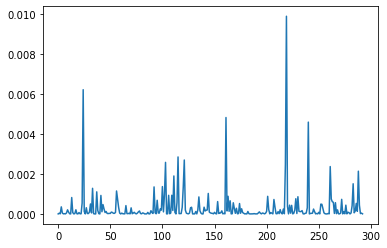

In [12]:
from matplotlib import pyplot as plt
plt.plot(averaged_counts)

In [13]:
# Importing libraries to classify data with function words
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [14]:
# Creating a grid search to search parameters for the best choices
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
grid = GridSearchCV(svr, parameters)

In [15]:
# Setting up the pipeline for function words
pipeline1 = Pipeline([('feature_extraction', extractor), ('clf', grid)])

In [16]:
scores = cross_val_score(pipeline1, documents, classes, scoring='f1_macro')
print(f'Score = {np.mean(scores)*100:.1f}%')

Score = 72.8%


In [17]:
# Setting up the pipeline for n-grams
pipeline = Pipeline([('feature_extraction', CountVectorizer(analyzer='char', ngram_range=(3, 3))), ('classifier', grid)])
scores = cross_val_score(pipeline, documents, classes, scoring='f1_macro')
print(f'Score = {np.mean(scores)*100:.1f}%')

Score = 76.7%


In [22]:
'''
Using the Enron dataset for authorship analysis
https://www.cs.cmu.edu/~./enron/
'''

# Setting up the data folder
enron_data_folder = os.path.join(os.path.expanduser('~'), "OneDrive", "Desktop", "Pace", "CS619", "Chapter09", "enron", "maildir")

In [23]:
# Parsing emails to select random authors
from email.parser import Parser
p = Parser()

In [24]:
# Defining a function that loops through the authors and retrieve a number of emails for that author, and store the document and class information in some lists
from sklearn.utils import check_random_state

def get_enron_corpus(num_authors=10, data_folder=enron_data_folder, min_docs_author=10, max_docs_author=100, random_state=None):
    random_state = check_random_state(random_state)
    email_addresses = sorted(os.listdir(data_folder))
    # Randomly shuffle the authors. We use random_state here to get a repeatable shuffle
    random_state.shuffle(email_addresses)
    # Setup structures for storing information, including author information
    documents = []
    classes = []
    author_num = 0
    authors = {}    # Maps authors numbers to author names
    for user in email_addresses:
        user_email_folder = os.path.join(data_folder, user)
        mail_folders = [os.path.join(user_email_folder, subfolder) 
                        for subfolder in os.listdir(user_email_folder)
                        if "sent" in subfolder]
        try:
            authored_emails = [open(os.path.join(mail_folder, email_filename), encoding='cp1252').read()
                                for mail_folder in mail_folders
                                for email_filename in os.listdir(mail_folder)]
        except IsADirectoryError:
            continue
        if len(authored_emails) < min_docs_author:
            continue
        if len(authored_emails) > max_docs_author:
            authored_emails = authored_emails[:max_docs_author]
        # Parse emails, store the content in documents and add to the classes list
        contents = [p.parsestr(email)._payload for email in authored_emails]
        documents.extend(contents)
        classes.extend([author_num] * len(authored_emails))
        authors[user] = author_num
        author_num += 1
        if author_num >= num_authors or author_num >= len(email_addresses):
            break
    return documents, np.array(classes), authors

In [25]:
# Getting the dataset
documents, classes, authors = get_enron_corpus(data_folder=enron_data_folder, random_state=14)

In [26]:
# Checking data
print(documents[100])

Please review MEH presentation and send comments to MEH by 5:00 p.m.  May 12, 
1999 via notes mail.

Thank you,

Sylvia T. Sauseda/MEH


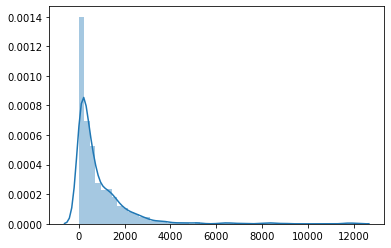

In [27]:
# Ploting the histogram of documents length
document_lengths = [len(document) for document in documents]
sns.distplot(document_lengths)

In [28]:
# Computing dataset score
scores = cross_val_score(pipeline, documents, classes, scoring='f1_macro')
print(f'Score: {np.mean(scores)*100:.1f}%')

Score: 57.4%


In [29]:
# Refitting the dataset
from sklearn.model_selection import train_test_split

training_documents, testing_documents, y_train, y_test = train_test_split(documents, classes, random_state=14)
pipeline.fit(training_documents, y_train)
y_pred = pipeline.predict(testing_documents)

In [30]:
# Verifying the best parameter
print(pipeline.named_steps['classifier'].best_params_)

{'C': 1, 'kernel': 'linear'}


In [31]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
cm = cm / cm.astype(np.float).sum(axis=1)

In [32]:
# Getting sorted author's names
sorted_authors = sorted(authors.keys(), key=lambda x: authors[x])

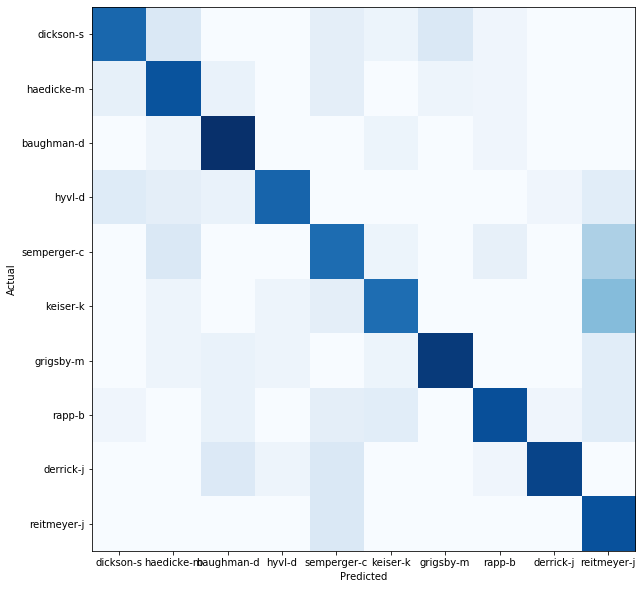

In [33]:
# Ploting the confusion matrix
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
tick_marks = np.arange(len(sorted_authors))
plt.xticks(tick_marks, sorted_authors)
plt.yticks(tick_marks, sorted_authors)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()